# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# 2. Loading Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


# 3.Data Preprocessing

## 3.1 Checking for Duplicate Rows

In [5]:
print('Number of duplicate rows in train: {}'.format(sum(train.duplicated())))
print('Number of duplicate rows in test: {}'.format(sum(test.duplicated())))

Number of duplicate rows in train: 0
Number of duplicate rows in test: 0


## 3.2 Checking for Missing Values

In [6]:
train.isna().sum().sum() #Checking total sum since there are a large number of parameters

0

## 3.3 Checking for Class Imbalance

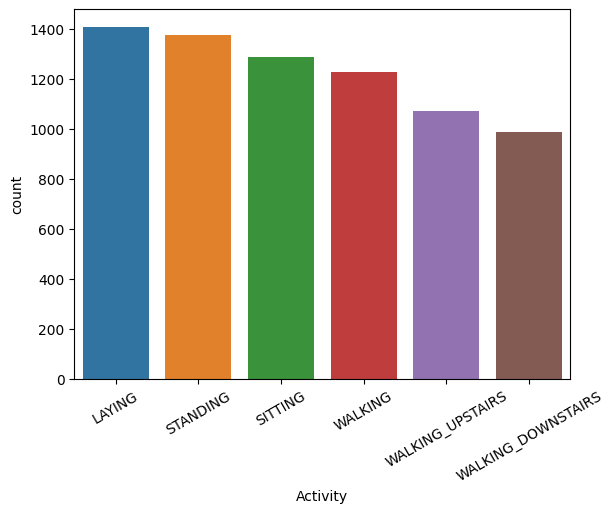

In [7]:
sns.countplot(data=train, x='Activity', order=train['Activity'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

# 4. EDA

In [8]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),
                       orient='index').rename(columns={0:'count'}).sort_values(by='count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


## 4.1 tBodyAccMag-mean() feature

Text(0.0, 1.25, 'Dynamic Activities')

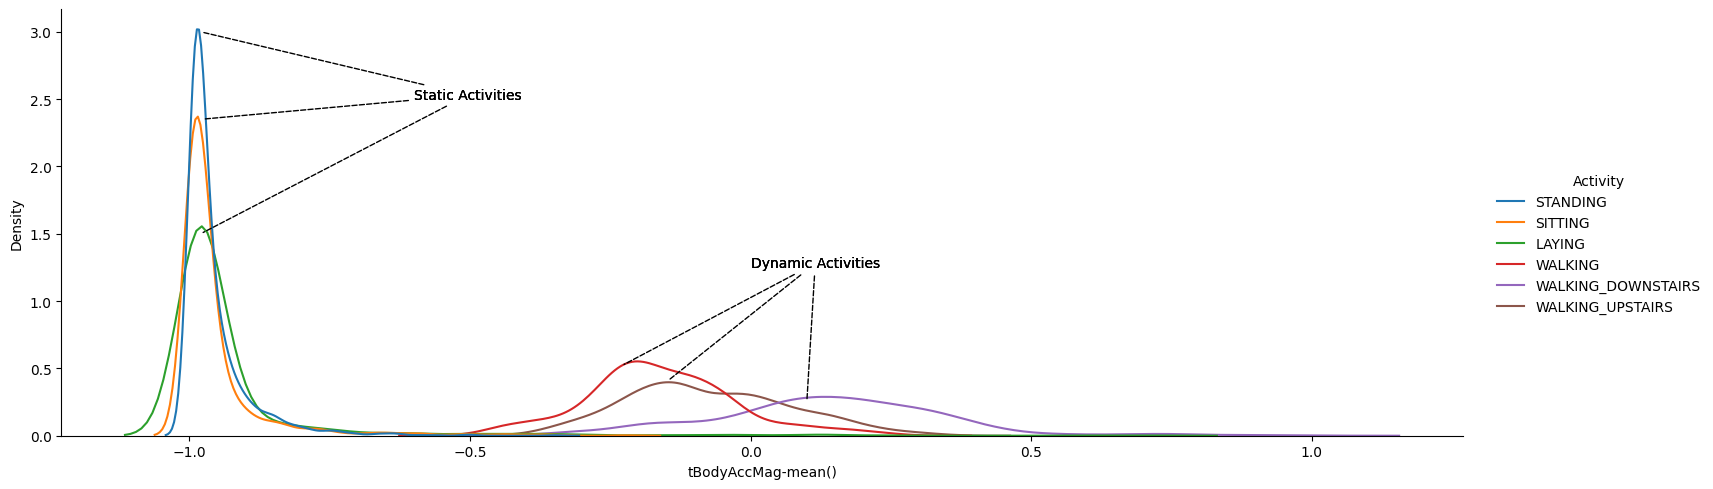

In [9]:
sns.displot(train, x='tBodyAccMag-mean()', hue='Activity', kind='kde', height=5, aspect=3)

plt.annotate('Static Activities', xy=(-0.98, 1.5),xytext=(-0.6,2.5), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activities', xy=(-0.98, 2.35),xytext=(-0.6,2.5), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activities', xy=(-0.98, 3),xytext=(-0.6,2.5), arrowprops={'arrowstyle':'-', 'ls':'dashed'})

plt.annotate('Dynamic Activities', xy=(-0.23, 0.52),xytext=(0.0,1.25), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activities', xy=(-0.15, 0.4),xytext=(0.0,1.25), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activities', xy=(0.10, 0.25),xytext=(0.0,1.25), arrowprops={'arrowstyle':'-', 'ls':'dashed'})


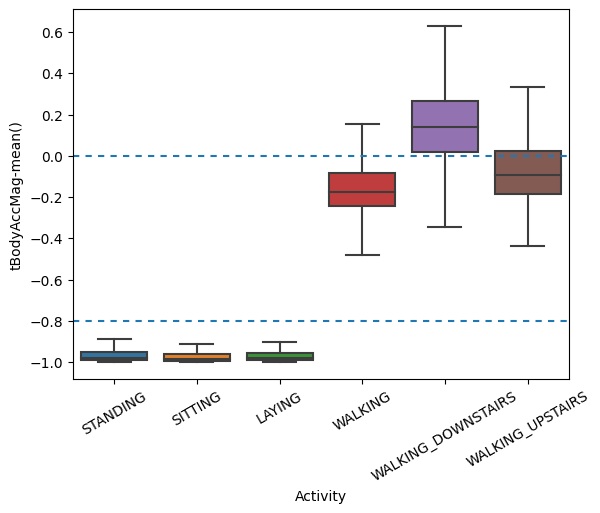

In [10]:
sns.boxplot(data=train, x='Activity', y='tBodyAccMag-mean()', showfliers=False)
plt.axhline(y=-0.8, dashes=(3,3))
plt.axhline(y=0.0, dashes=(3,3))
plt.xticks(rotation=30)
plt.show()

## 4.2 Analysing angle between x-axis and gravityMean feature

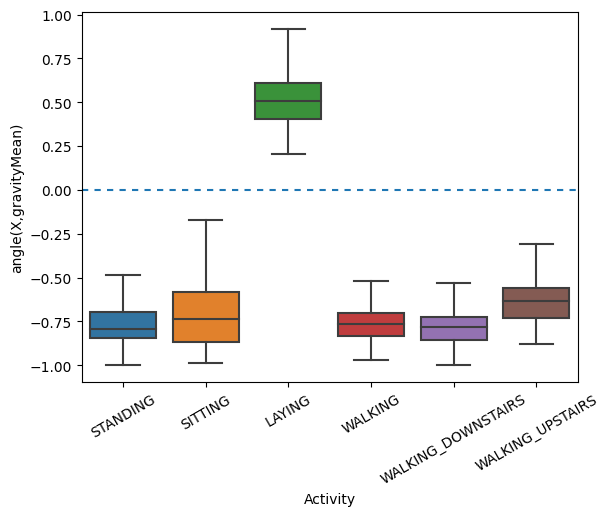

In [11]:
sns.boxplot(data=train, x='Activity', y='angle(X,gravityMean)', showfliers=False)
plt.axhline(y=0.0, dashes=(3,3))
plt.xticks(rotation=30)
plt.show()

## 4.3 Analysing angle between y-axis and gravityMean feature

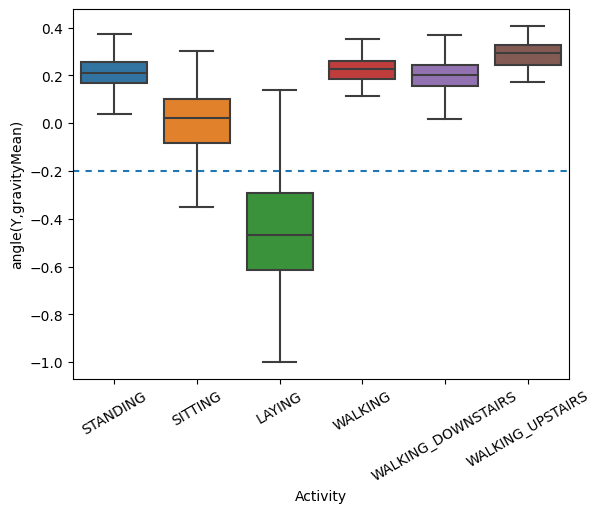

In [12]:
sns.boxplot(data=train, x='Activity', y='angle(Y,gravityMean)', showfliers=False)
plt.axhline(y=-0.2, dashes=(3,3))
plt.xticks(rotation=30)
plt.show()

# 4.4 PCA

In [13]:
x_for_pca = train.drop(['subject','Activity'],axis=1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

<Axes: >

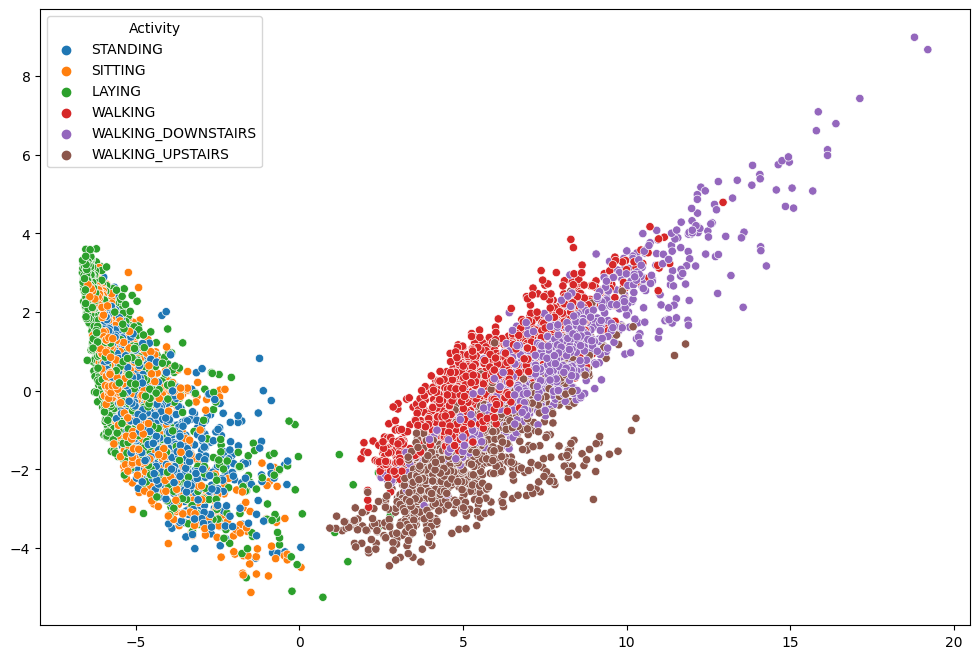

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=train['Activity'])

In [15]:
x_for_tsne = train.drop(['subject','Activity'],axis=1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [16]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

<Axes: >

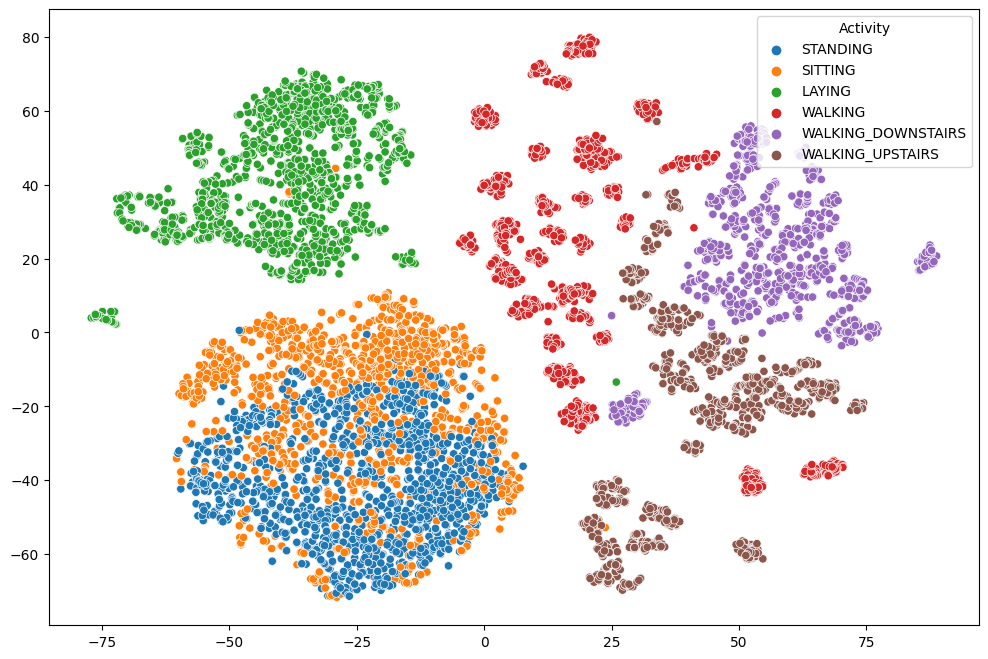

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=train['Activity'])

# 5. ML Models

In [18]:
x_train = train.drop(['subject','Activity'],axis=1)
y_train = train['Activity']

x_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test['Activity']

## 5.1 Logistic Regression

In [21]:
lr = LogisticRegression()
parameters = {'max_iter': [100,200,500]}
lr_cv = RandomizedSearchCV(lr, param_distributions=parameters, cv=5, random_state=0)
lr_cv.fit(x_train, y_train)

pred = lr_cv.predict(x_test)

In [22]:
lr_accuracy = accuracy_score(y_test, pred)
print('Logistic Regression Accuracy: {}'.format(lr_accuracy))

Logistic Regression Accuracy: 0.954954954954955


In [26]:
lr_cv.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<Axes: >

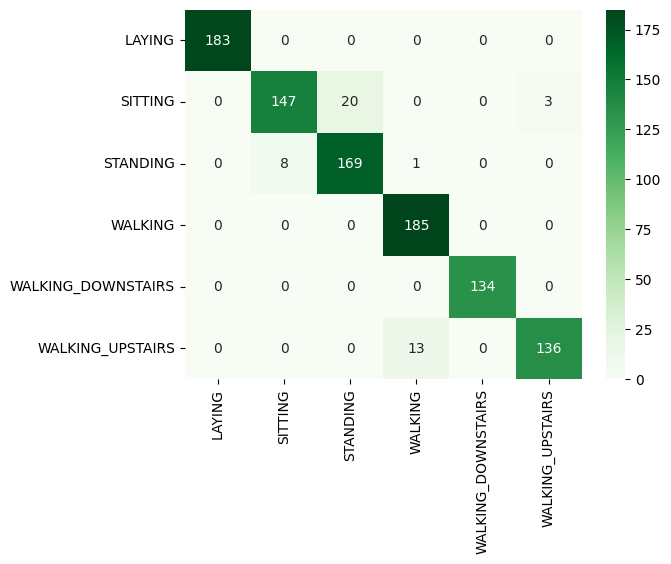

In [34]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',xticklabels=lr_cv.classes_, yticklabels=lr_cv.classes_)

In [36]:
print('Best estimator: {}'.format(lr_cv.best_estimator_))
print('Best parameters: {}'.format(lr_cv.best_params_))
print('Best score: {}'.format(lr_cv.best_score_))

Best estimator: LogisticRegression(max_iter=500)
Best parameters: {'max_iter': 500}
Best score: 0.9374393836392475


## 5.2 SVM

In [37]:
svc = SVC()
parameters = {'kernel': ['linear','poly','sigmoid', 'rbf'],
             'C': [100, 50]}
svc_cv = RandomizedSearchCV(svc, param_distributions=parameters, cv=5, random_state=0)
svc_cv.fit(x_train, y_train)

pred = svc_cv.predict(x_test)

In [38]:
svc_accuracy = accuracy_score(y_test, pred)
print('SVC Accuracy: {}'.format(svc_accuracy))

SVC Accuracy: 0.9679679679679679


In [ ]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',xticklabels=svc_cv.classes_, yticklabels=svc_cv.classes_)

In [40]:
print('Best estimator: {}'.format(svc_cv.best_estimator_))
print('Best parameters: {}'.format(svc_cv.best_params_))
print('Best score: {}'.format(svc_cv.best_score_))

Best estimator: SVC(C=100)
Best parameters: {'kernel': 'rbf', 'C': 100}
Best score: 0.9453280428418818


# 5.3 Decision Trees

In [43]:
dt = DecisionTreeClassifier()
parameters = {'max_depth': np.arange(2,17,2)}
dt_cv = RandomizedSearchCV(dt, param_distributions=parameters, cv=5, random_state=0)
dt_cv.fit(x_train, y_train)

pred = dt_cv.predict(x_test)

In [44]:
dt_accuracy = accuracy_score(y_test, pred)
print('SVC Accuracy: {}'.format(dt_accuracy))

SVC Accuracy: 0.8478478478478478


<Axes: >

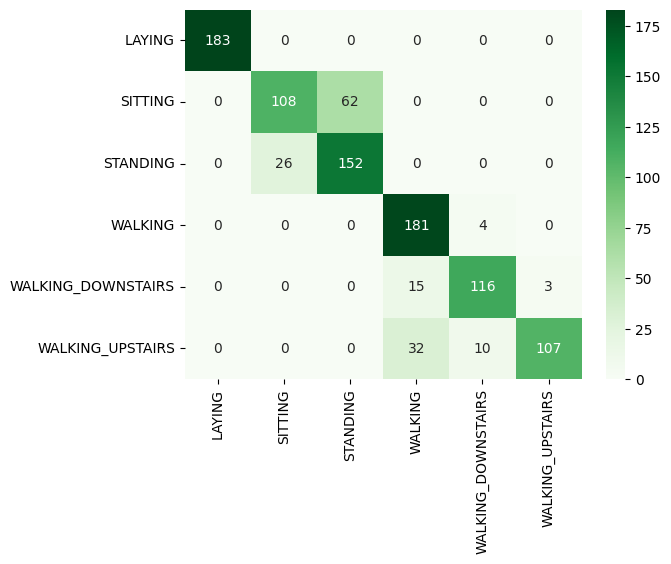

In [45]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',xticklabels=dt_cv.classes_, yticklabels=dt_cv.classes_)

In [46]:
print('Best estimator: {}'.format(dt_cv.best_estimator_))
print('Best parameters: {}'.format(dt_cv.best_params_))
print('Best score: {}'.format(dt_cv.best_score_))

Best estimator: DecisionTreeClassifier(max_depth=8)
Best parameters: {'max_depth': 8}
Best score: 0.8576003181694158


## 5.4 Random Forest

In [49]:
rf = RandomForestClassifier()
parameters = {'max_depth': np.arange(2,17,2)}
rf_cv = RandomizedSearchCV(rf, param_distributions=parameters, cv=5, random_state=0)
rf_cv.fit(x_train, y_train)

pred = rf_cv.predict(x_test)

In [50]:
rf_accuracy = accuracy_score(y_test, pred)
print('SVC Accuracy: {}'.format(rf_accuracy))

SVC Accuracy: 0.928928928928929


<Axes: >

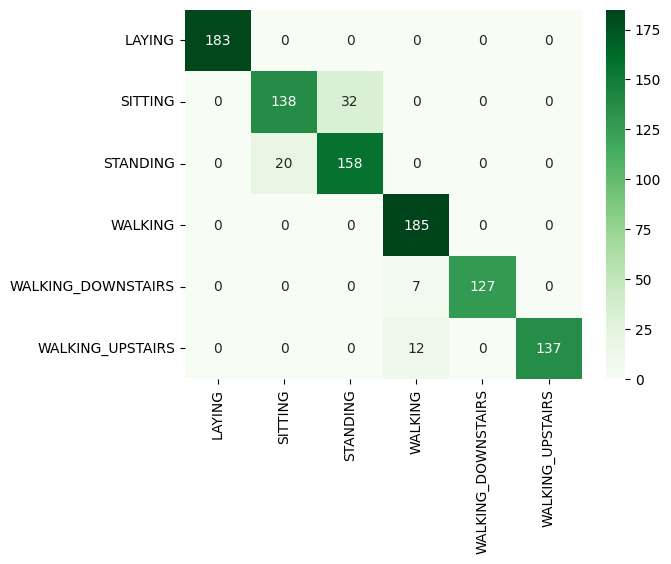

In [51]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',xticklabels=rf_cv.classes_, yticklabels=rf_cv.classes_)

In [52]:
print('Best estimator: {}'.format(rf_cv.best_estimator_))
print('Best parameters: {}'.format(rf_cv.best_params_))
print('Best score: {}'.format(rf_cv.best_score_))

Best estimator: RandomForestClassifier(max_depth=14)
Best parameters: {'max_depth': 14}
Best score: 0.9193448854728838
